<a href="https://colab.research.google.com/github/karioth/PredNet_tf/blob/main/testing_kitti_tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/karioth/PredNet_tf

from google.colab import drive
drive.mount('/content/drive')

Cloning into 'PredNet_tf'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 233 (delta 51), reused 7 (delta 1), pack-reused 139
Receiving objects: 100% (233/233), 4.51 MiB | 11.60 MiB/s, done.
Resolving deltas: 100% (111/111), done.
Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/PredNet_tf')

from datapipeline_tf_kitti.dataset_creation import make_dataset
from datapipeline_tf_kitti.dataset_utils import get_relevant_paths, visualize_sequence

import tensorflow as tf


DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/PredNet/raw_data/'

# Configuration
sequence_length = 10  # Length of the image sequence
batch_size = 4  # Number of sequences per batch
target_size = (128, 160)  # Target height and width of images
shuffle_buffer_size= 400 # Number of images to shuffle in the buffer adjust to computational resources
base_dir = DATA_DIR  # Change this to your actual raw data directory

# Get the paths to the picture files
train_paths, test_paths, val_paths = get_relevant_paths(base_dir, [DATA_DIR + 'sources_train.hkl', DATA_DIR + 'sources_test.hkl', DATA_DIR + 'sources_val.hkl'])


# Create the dataset
dataset_val = make_dataset(train_paths, sequence_length, batch_size, target_size, N_seq=100)
dataset_test = make_dataset(test_paths, sequence_length, batch_size, target_size, N_seq=100)
dataset_train = make_dataset(val_paths, sequence_length, batch_size, target_size, shuffle=True, shuffle_buffer_size=shuffle_buffer_size)

In [3]:
# @title Checking Shapes
print(f"dataset.element_spec: {dataset_train.element_spec}")

for example in dataset_train.take(1):
    features = example[0]
    print(f"Features shape: {features.shape}")

dataset.element_spec: (TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))
Features shape: (4, 10, 128, 160, 3)


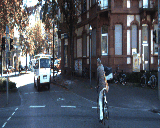

Shape of the sequence: (10, 128, 160, 3)


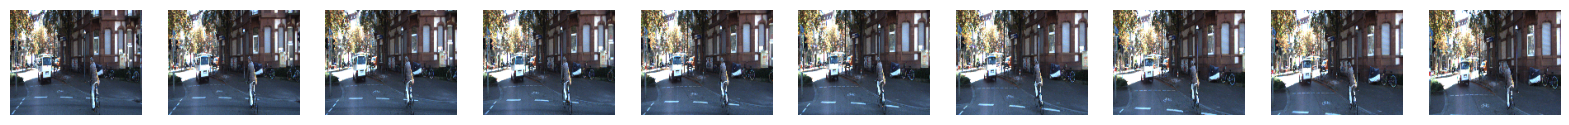

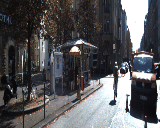

Shape of the sequence: (10, 128, 160, 3)


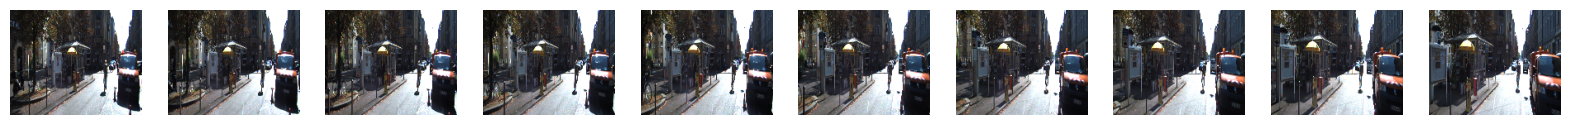

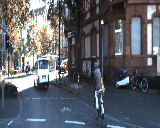

Shape of the sequence: (10, 128, 160, 3)


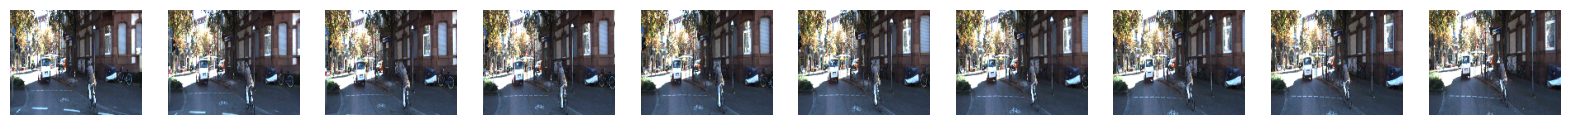

In [4]:
visualize_sequence(dataset_train)